In [1]:
import pandas as pd
import download_data
import feature_engineer
import os
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://divvy-tripdata.s3.amazonaws.com/index.html"
data_dir = os.getcwd()+'/Data'
data_file = os.path.join(data_dir,'clean_data.csv')

data = pd.read_csv(data_file)

/Users/tylerbell/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
len(data)

4489721

In [6]:
data.columns

Index(['ride_id', 'rideable_type', 'member_casual', 'start_station_id',
       'end_station_id', 'month', 'season', 'day', 'is_weekend', 'hour',
       'time_of_day', 'delta(meters)', 'delta(seconds)', 'trip_length',
       'avg_velocity(m/s)'],
      dtype='object')

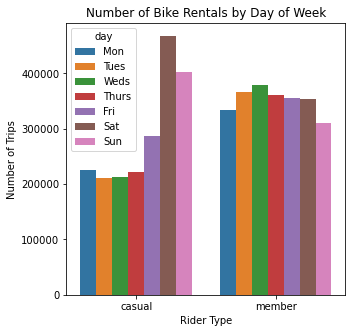

In [3]:
by_day = data.groupby(['member_casual','day'])[['ride_id']]
by_day_count = by_day.count().reset_index()

keys = np.arange(0,7)
values = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
day_map = dict(zip(keys,values))
by_day_count['day'] = by_day_count['day'].map(day_map)

plt.figure(figsize = (5,5))
ax = sns.barplot(x = "member_casual", y = "ride_id", hue = "day", data = by_day_count)
ax.set_xlabel("Rider Type")
ax.set_ylabel("Number of Trips")
ax.set_title("Number of Bike Rentals by Day of Week")
plt.show()

<AxesSubplot:xlabel='day', ylabel='Count'>

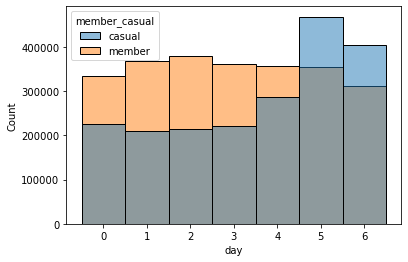

In [7]:
sns.histplot(data, x = "day", discrete = True, hue = "member_casual")

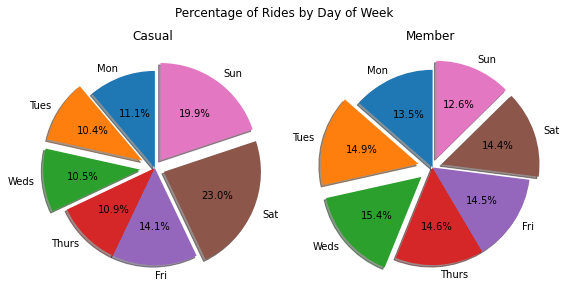

In [41]:
casual_by_day = by_day_count[by_day_count.member_casual=='casual']
member_by_day = by_day_count[by_day_count.member_casual =='member']
explode = [0,0.15,0.15,0,0,0.1,0.1]
#colors = sns.color_palette()[:8]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (8,8))
ax1 = axes[0]
ax2 = axes[1]


sizes = member_by_day['ride_id']
labels = member_by_day['day']
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow = True, startangle=90)
ax2.axis('equal')
ax2.set_title("Member")

sizes = casual_by_day['ride_id']
labels = casual_by_day['day']
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow = True, startangle=90)
ax1.axis('equal')
ax1.set_title("Casual")

fig.suptitle('Percentage of Rides by Day of Week')
plt.tight_layout()
plt.subplots_adjust(bottom = 0.5)
plt.show()

In [ ]:
# For members, the most popular days to use the service are
# Tuesday and Wednesday.
# For casual riders on the other hand, Tues and Weds are the least 
# popular
# Have a promotion to promote Tues+Weds.

# For members, teh weekend is teh least popular day after Mon
# While for casuals, the weekend is the most popular.

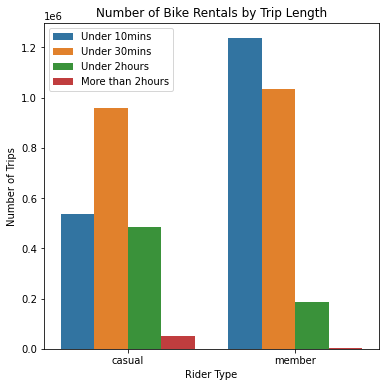

In [5]:
by_length = data.groupby(['member_casual','trip_length'])[['ride_id']]
by_length_count = by_length.count().reset_index()
new_idx = [1,3,2,0,5,7,6,4]

plt.figure(figsize = (6,6))
ax = sns.barplot(x = "member_casual", y = "ride_id", hue = "trip_length", data = by_length_count.iloc[new_idx])
ax.set_xlabel("Rider Type")
ax.set_ylabel("Number of Trips")
ax.set_title("Number of Bike Rentals by Trip Length")
plt.legend(loc = "upper left")
plt.show()

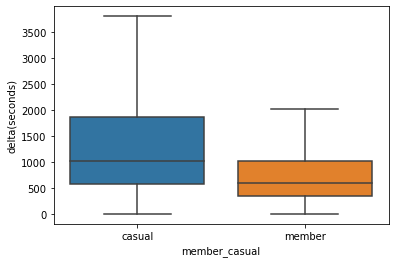

In [110]:
#remove outliers
ax = sns.boxplot(x="member_casual", y="delta(seconds)", data = data, whis = 1.5,showfliers=False)

In [124]:
# Members have more sub 10 minute trips. While casuals are mainly between 10 and 30 mins.
# Maybe encourage a sub 15 minute discount. But also don't want to encourage speeding.
# It'd be cool to have two pie charts on top of each other to the right of this.

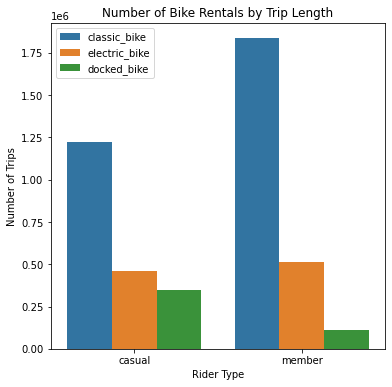

In [14]:
by_ride = data.groupby(['member_casual','rideable_type'])[['ride_id']]
by_ride_count = by_ride.count().reset_index()
new_idx = [0,2,1,3,5,4]
plt.figure(figsize = (6,6))
ax = sns.barplot(x = "member_casual", y = "ride_id", hue = "rideable_type", data = by_ride_count.iloc[new_idx])
ax.set_xlabel("Rider Type")
ax.set_ylabel("Number of Trips")
ax.set_title("Number of Bike Rentals by Trip Length")
plt.legend(loc = "upper left")
plt.show()

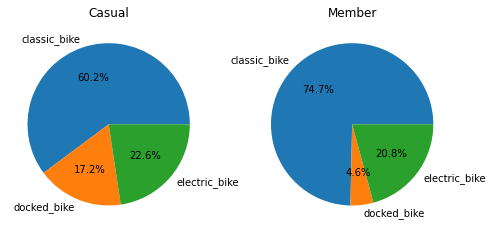

In [40]:
casual_by_ride = by_ride_count[by_ride_count.member_casual == 'casual']
member_by_ride = by_ride_count[by_ride_count.member_casual == 'member']

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(8,8))
ax1 = axes[0]
ax2 = axes[1]

sizes = casual_by_ride['ride_id']
labels = casual_by_ride['rideable_type']
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%')
ax1.set_title('Casual')

sizes = member_by_ride['ride_id']
labels = member_by_ride['rideable_type']
ax2.pie(sizes, labels = labels, autopct = '%1.1f%%')
ax2.set_title('Member')

plt.show()

In [8]:
# Redocks

same_station_idx = data.start_station_id == data.end_station_id
zero_dist_idx = data['delta(meters)'] == 0

# Remove data that states two different station IDs but says net displacement was 0.

anom = ~same_station_idx&zero_dist_idx
num_anom = sum(anom)

data = data[~anom]

print('{} rows removed for having inconsistent station/distance information'.format(num_anom))

98 rows removed for having inconsistent station/distance information


([<matplotlib.patches.Wedge at 0x7ff8fff70c10>,
 [Text(-0.5772269827984334, 0.9363808041226696, 'casual'),
  Text(0.5772269827984333, -0.9363808041226697, 'member')])

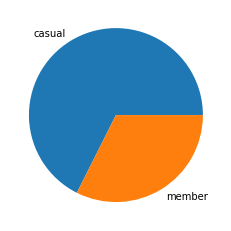

In [52]:
redocks = data[same_station_idx]
redocks_count = redocks.groupby(['member_casual'])['ride_id'].count()
fig,ax = plt.subplots(1,1)

ax.pie(redocks_count.values, labels = redocks_count.index)

In [54]:
data.columns

Index(['ride_id', 'rideable_type', 'member_casual', 'start_station_id',
       'end_station_id', 'month', 'season', 'day', 'is_weekend', 'hour',
       'time_of_day', 'delta(meters)', 'delta(seconds)', 'trip_length',
       'avg_velocity(m/s)'],
      dtype='object')

In [53]:
## By Month

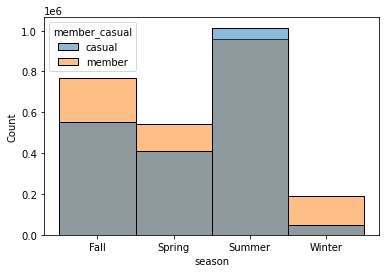

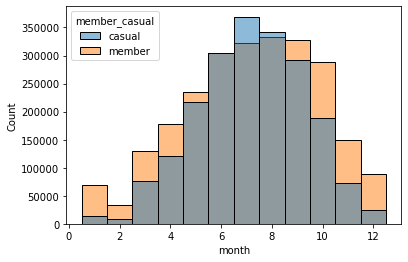

In [92]:
sns.histplot(data, x = "season", discrete = True, hue = "member_casual")
plt.show()
# Make a pie chart
sns.histplot(data, x = "month", discrete = True, hue = "member_casual")
plt.show()

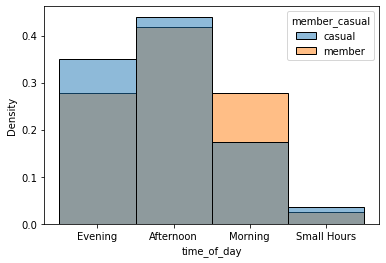

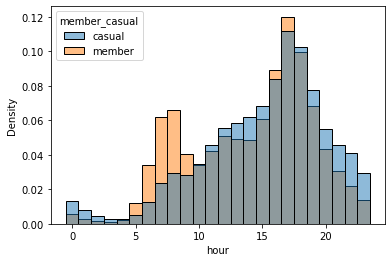

In [114]:
data2 = data[data.is_weekend != True]

sns.histplot(data2, x = "time_of_day", discrete = True, hue = "member_casual", stat = "density", common_norm = False)
plt.show()
# Maybe group by is weekend as well.
sns.histplot(data2, x = "hour", discrete = True, hue = "member_casual", stat = "density", common_norm =False)
plt.show()

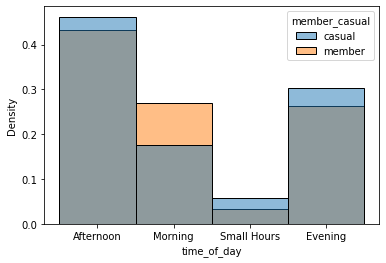

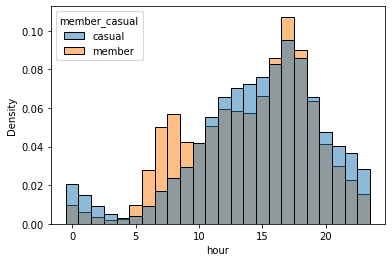

In [91]:
sns.histplot(data, x = "time_of_day", discrete = True, hue = "member_casual", stat = "density", common_norm = False)
plt.show()
# Maybe group by is weekend as well.
sns.histplot(data, x = "hour", discrete = True, hue = "member_casual", stat = "density", common_norm =False)
plt.show()

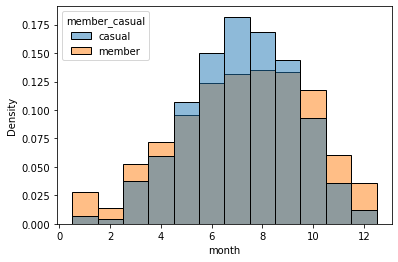

In [90]:
sns.histplot(data, x = "month", discrete = True, hue = "member_casual", stat = "density", common_norm = False)
plt.show()

In [ ]:
#Create a boxplot for trip length
# Create a boxplot for displacement

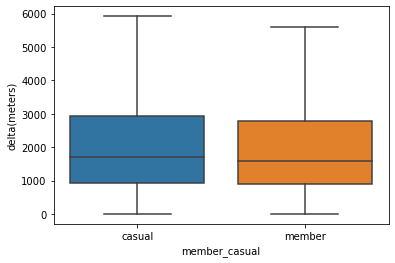

In [111]:
#remove outliers
ax = sns.boxplot(x="member_casual", y="delta(meters)", data = data, whis = 1.5,showfliers=False)

In [ ]:
# Recommendation: Casual Riders don't know how to properly dock
# Inability to do so could cause frustration with the service.

<AxesSubplot:xlabel='member_casual,is_weekend'>

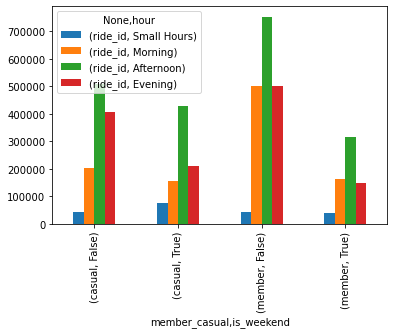

In [51]:
data.groupby(['member_casual','is_weekend','hour'])[['ride_id']].count().unstack().plot(kind = 'bar')

In [ ]:
# Bin hours into 12AM -> 5AM, 6AM -> 11AM, 12PM -> 5PM, 6PM -> 11PM

In [ ]:
# Plot distance travelled as histogram.
# Plot elapsed time as histogram.

<AxesSubplot:xlabel='member_casual'>

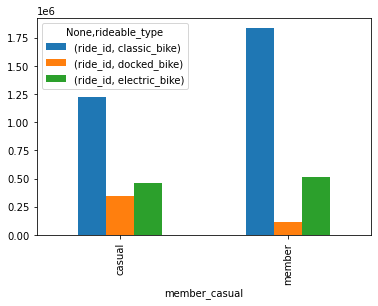

In [35]:
data.groupby(['member_casual','rideable_type'])[['ride_id']].count().unstack().plot(kind = 'bar')

In [9]:
# Its possible that a station did not have an ID at the time of the ridfe
# Although unlikely..
# But the lack of a coordinate for the end point is definitely suspicious.
# Drop points that have no coordinate for end point

In [29]:
# Advice one: include a promotion for casual users to ride during the week (Mon-Thurs).
# This data shows that casual users primarily only use the service on the weekend.
# For members, it is a lot closer to uniform across the days, as they may use the bicycle
# in their daily life, such as in their commute.
# If we can encourage casual riders to ride during the week, we may be able to up conversion
# suggestions to encourage weekday use: cheaper rate, point+reward system
# Promote this service as more than a weekend novelty.
# Buzz: 
# 1) "Save the Earth. Bike to Work"
# 2) "Take a weekday ride. You deserve it."

In [ ]:
# Analysis:
# What type of person becomes an annual member of a bicycle sharing service?

# Thought 1: More profitable to own your own bike
# No room or place to lock bike, enjoy perk of having  often?
# Convenient locations of having stations. Do some 